In [1]:
import os
import pickle
import torch

import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_path = "/projects/leelab/cl-explainability/results/imagenette2/simclr_x1"
methods = ["vanilla_grad", "int_grad", "random_baseline"]
methods = ["contrastive_" + method for method in methods]
num_evals = 3
def format_eval_name(name):
    format_map = {
        "similarity": "Similarity to corpus",
        "contrastive_similarity": "Similarity to corpus vs. foil",
        "majority_pred_prob": "Predicted probability of corpus majority",
    }
    return format_map[name]

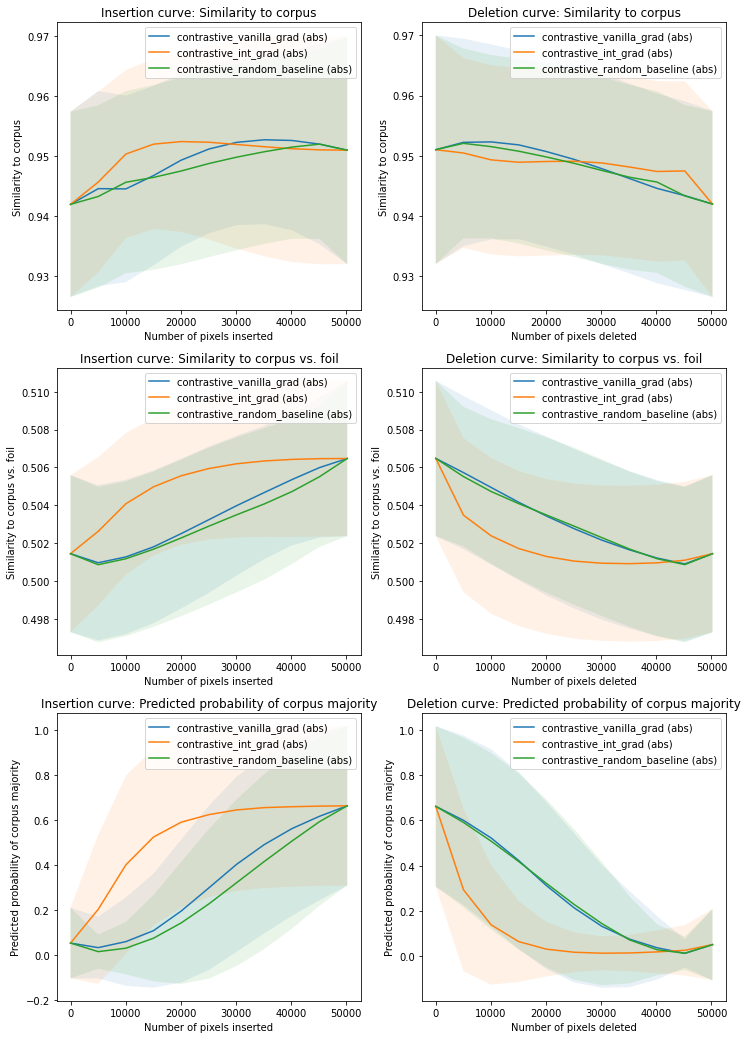

In [3]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12, 18))

for method in methods:
    with open(
        os.path.join(
            result_path,
            method,
            "123",
            "eval_results_corpus_size=100_foil_size=500_explicand_size=100_removal=blurring_blur_strength=5.0_eval_superpixel_dim=1_eval_foil_size=500_abs.pkl",
        ),
        "rb",
    ) as handle:
        outputs = pickle.load(handle)
    
    for j in range(num_evals):
    
        insertion_curves_list = []
        deletion_curves_list = []
        insertion_num_features = None
        deletion_num_features = None
        
        for target, results in outputs.items():
            insertion_curves_list.append(results["insertion_curves"][j])
            deletion_curves_list.append(results["deletion_curves"][j])
            insertion_num_features = results["insertion_num_features"]
            deletion_num_features = results["deletion_num_features"]
            eval_name = format_eval_name(results["eval_model_names"][j])

        insertion_curves = torch.cat(insertion_curves_list)
        deletion_curves = torch.cat(deletion_curves_list)

        insertion_curve_mean = insertion_curves.mean(dim=0).cpu().numpy()
        insertion_curve_std = insertion_curves.std(dim=0).cpu().numpy()
        deletion_curve_mean = deletion_curves.mean(dim=0).cpu().numpy()
        deletion_curve_std = deletion_curves.std(dim=0).cpu().numpy()

        axes[j, 0].plot(
            insertion_num_features,
            insertion_curve_mean,
            label=method + " (abs)",
        )
        axes[j, 0].fill_between(
            insertion_num_features,
            insertion_curve_mean - insertion_curve_std,
            insertion_curve_mean + insertion_curve_std,
            alpha=0.1,
        )
        axes[j, 0].set_title(f"Insertion curve: {eval_name}")
        axes[j, 0].set_xlabel("Number of pixels inserted")
        axes[j, 0].set_ylabel(f"{eval_name}")
        axes[j, 0].legend()

        axes[j, 1].plot(
            deletion_num_features,
            deletion_curve_mean,
            label=method + " (abs)",
        )
        axes[j, 1].fill_between(
            deletion_num_features,
            deletion_curve_mean - deletion_curve_std,
            deletion_curve_mean + deletion_curve_std,
            alpha=0.1,
        )
        axes[j, 1].set_title(f"Deletion curve: {eval_name}")
        axes[j, 1].set_xlabel("Number of pixels deleted")
        axes[j, 1].set_ylabel(f"{eval_name}")
        axes[j, 1].legend()

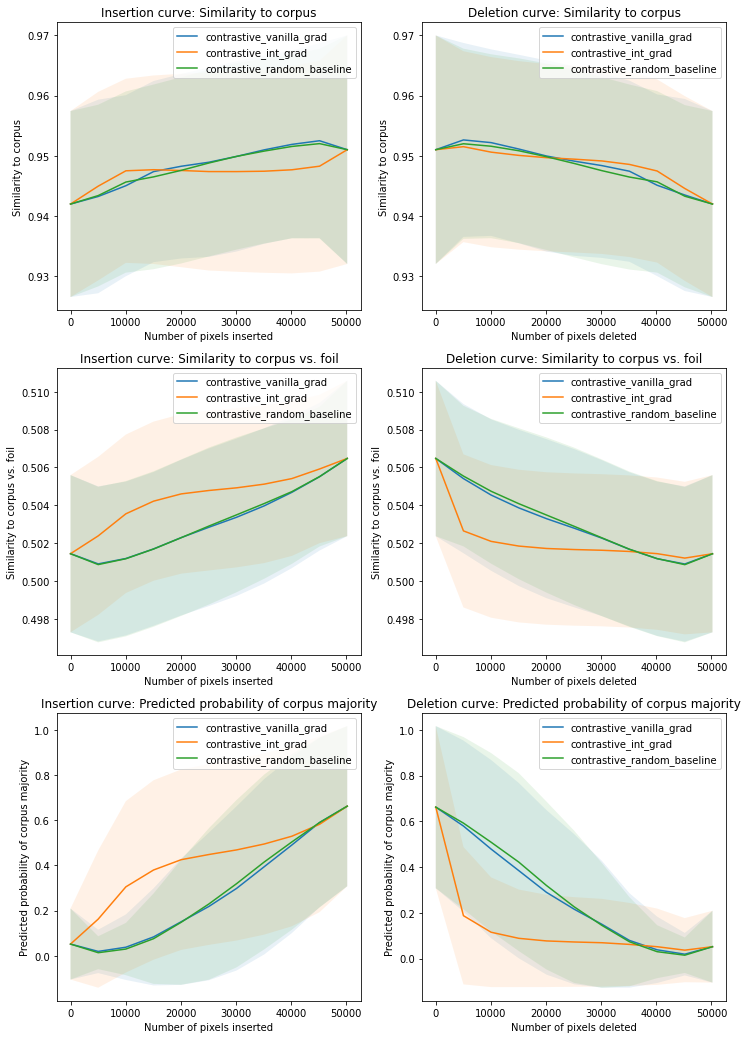

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12, 18))

for method in methods:
    with open(
        os.path.join(
            result_path,
            method,
            "123",
            "eval_results_corpus_size=100_foil_size=500_explicand_size=100_removal=blurring_blur_strength=5.0_eval_superpixel_dim=1_eval_foil_size=500.pkl",
        ),
        "rb",
    ) as handle:
        outputs = pickle.load(handle)
    
    for j in range(num_evals):
    
        insertion_curves_list = []
        deletion_curves_list = []
        insertion_num_features = None
        deletion_num_features = None
        
        for target, results in outputs.items():
            insertion_curves_list.append(results["insertion_curves"][j])
            deletion_curves_list.append(results["deletion_curves"][j])
            insertion_num_features = results["insertion_num_features"]
            deletion_num_features = results["deletion_num_features"]
            eval_name = format_eval_name(results["eval_model_names"][j])

        insertion_curves = torch.cat(insertion_curves_list)
        deletion_curves = torch.cat(deletion_curves_list)

        insertion_curve_mean = insertion_curves.mean(dim=0).cpu().numpy()
        insertion_curve_std = insertion_curves.std(dim=0).cpu().numpy()
        deletion_curve_mean = deletion_curves.mean(dim=0).cpu().numpy()
        deletion_curve_std = deletion_curves.std(dim=0).cpu().numpy()

        axes[j, 0].plot(
            insertion_num_features,
            insertion_curve_mean,
            label=method,
        )
        axes[j, 0].fill_between(
            insertion_num_features,
            insertion_curve_mean - insertion_curve_std,
            insertion_curve_mean + insertion_curve_std,
            alpha=0.1,
        )
        axes[j, 0].set_title(f"Insertion curve: {eval_name}")
        axes[j, 0].set_xlabel("Number of pixels inserted")
        axes[j, 0].set_ylabel(f"{eval_name}")
        axes[j, 0].legend()

        axes[j, 1].plot(
            deletion_num_features,
            deletion_curve_mean,
            label=method,
        )
        axes[j, 1].fill_between(
            deletion_num_features,
            deletion_curve_mean - deletion_curve_std,
            deletion_curve_mean + deletion_curve_std,
            alpha=0.1,
        )
        axes[j, 1].set_title(f"Deletion curve: {eval_name}")
        axes[j, 1].set_xlabel("Number of pixels deleted")
        axes[j, 1].set_ylabel(f"{eval_name}")
        axes[j, 1].legend()